In [34]:
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint






%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [35]:
src_dir = 'C:\\Users\\USER\\Desktop\\Rock-Paper-Scissors\\rps-cv-images'
src_dir_yehonatan = '/home/gentex/Rock-Paper-Scissors/Rock-Paper-Scissors/rps-cv-images/'
paper_dir = os.path.join(src_dir,'paper')
rock_dir = os.path.join(src_dir,'rock')
scissors_dir = os.path.join(src_dir,'scissors')

In [36]:
labels = ['paper','scissors','rock']

In [37]:
def input_target_split(train_dirs, labels):
    dataset = []
    count = 0
    for label, train_dir in zip(labels, train_dirs):
        for image in os.listdir(train_dir):
            img = load_img(os.path.join(train_dir, image), target_size=(64, 64))
            img = img_to_array(img)
            img = img / 255.0
            dataset.append((img, count))
       
        count += 1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y)

In [38]:
train_dirs = [paper_dir, scissors_dir, rock_dir]

data_rps, labels_rps = input_target_split(train_dirs,labels)

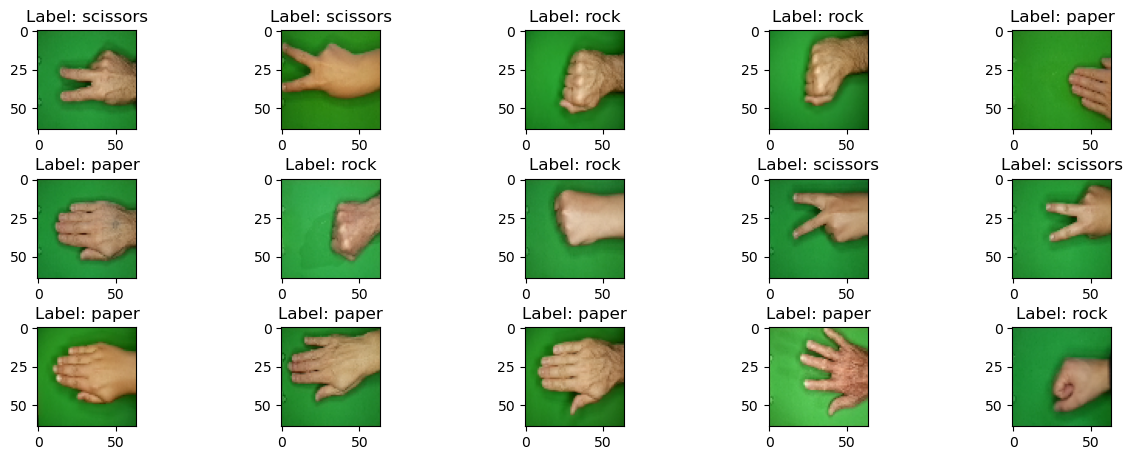

In [39]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(data_rps[i])
    plt.title(f'Label: {labels[labels_rps[i]]}')

# Label_names:
- 0: paper
- 1: scissors 
- 2: rock

In [40]:
data_rps_reshaped = data_rps.reshape(data_rps.shape[0], -1)

# Create a DataFrame with X_reshaped and y
df = pd.DataFrame(data=np.column_stack((data_rps_reshaped, labels_rps)), columns=[f'pixel_{i}' for i in range(data_rps_reshaped.shape[1])] + ['label'])
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,label
0,0.109804,0.454902,0.141176,0.113725,0.466667,0.152941,0.113725,0.466667,0.152941,0.113725,...,0.125490,0.490196,0.152941,0.129412,0.474510,0.145098,0.129412,0.474510,0.145098,1.0
1,0.129412,0.447059,0.090196,0.129412,0.447059,0.090196,0.141176,0.454902,0.101961,0.129412,...,0.156863,0.470588,0.070588,0.156863,0.470588,0.070588,0.164706,0.470588,0.074510,1.0
2,0.066667,0.411765,0.094118,0.078431,0.435294,0.109804,0.078431,0.447059,0.109804,0.098039,...,0.074510,0.392157,0.078431,0.074510,0.380392,0.070588,0.062745,0.372549,0.054902,2.0
3,0.105882,0.482353,0.141176,0.101961,0.494118,0.145098,0.117647,0.501961,0.152941,0.117647,...,0.062745,0.368627,0.078431,0.054902,0.356863,0.066667,0.043137,0.349020,0.054902,2.0
4,0.152941,0.478431,0.109804,0.152941,0.478431,0.109804,0.156863,0.482353,0.113725,0.149020,...,0.141176,0.454902,0.062745,0.137255,0.454902,0.070588,0.152941,0.443137,0.078431,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,0.109804,0.454902,0.141176,0.113725,0.458824,0.149020,0.113725,0.466667,0.152941,0.117647,...,0.141176,0.486275,0.176471,0.152941,0.486275,0.180392,0.156863,0.478431,0.176471,0.0
2184,0.074510,0.431373,0.098039,0.082353,0.450980,0.109804,0.086275,0.462745,0.113725,0.101961,...,0.066667,0.411765,0.090196,0.062745,0.396078,0.086275,0.054902,0.388235,0.070588,1.0
2185,0.247059,0.560784,0.203922,0.235294,0.560784,0.200000,0.250980,0.576471,0.227451,0.258824,...,0.282353,0.650980,0.243137,0.298039,0.647059,0.254902,0.290196,0.639216,0.239216,0.0
2186,0.101961,0.466667,0.149020,0.113725,0.474510,0.156863,0.105882,0.478431,0.156863,0.113725,...,0.133333,0.486275,0.152941,0.133333,0.486275,0.160784,0.133333,0.478431,0.149020,0.0


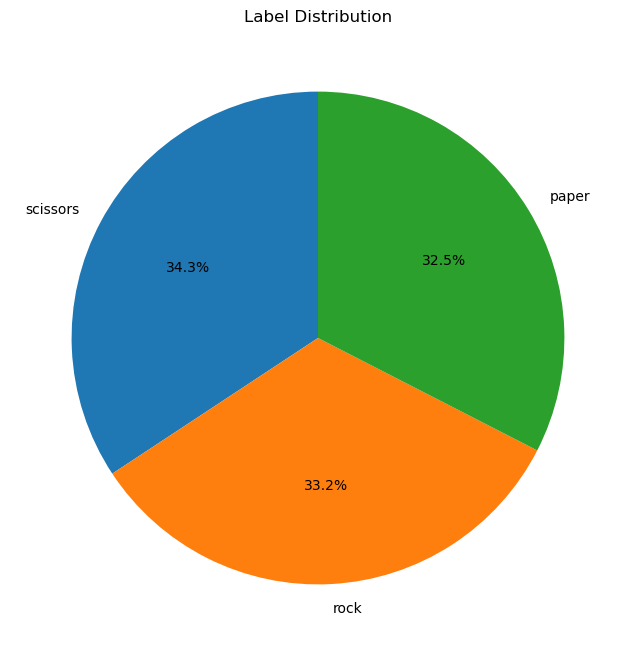

In [41]:

labels_num = df['label']

# Create a dictionary to map numerical labels to class names
label_names = {0: 'paper', 1: 'scissors', 2: 'rock'}

# Map numerical labels to class names in labels_num
class_labels = [label_names[label] for label in labels_num]

# Count the occurrences of each label
label_counts = pd.Series(class_labels).value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.show()

## We can understand is balanced, So we don't need to adjust it.


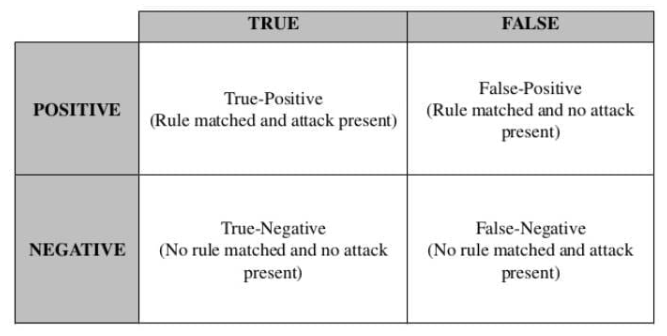

### Beacuase the data is balanced we can use the accuracy metrics scoring
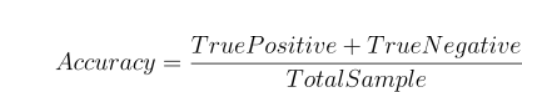

In [42]:
print(data_rps.shape)
print(labels_rps.shape)

(2188, 64, 64, 3)
(2188,)


## Split the data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data_rps, labels_rps, test_size=0.25, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([521, 557, 563], dtype=int64)) (array([0, 1, 2]), array([191, 193, 163], dtype=int64))


## Dummy model

In [44]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("The DummyClassifier score is:" ,round(accuracy_score(y_pred,y_test),4))

The DummyClassifier score is: 0.298


## Logistic Regression

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Ensure labels are in the correct format and range
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Define input shape
input_shape = (64*64*3,)

# Define the number of classes
num_classes = 3

# Define the logistic regression model with softmax activation for multi-class classification
model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

# Compile the model with appropriate loss function for multi-class classification
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Use ModelCheckpoint to save the model with the best validation accuracy
checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train_flat, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2, callbacks=[model_checkpoint_callback])

# Load the best model
model.load_weights(checkpoint_filepath)

# Get the best accuracy and its corresponding loss
best_accuracy = max(history.history['val_accuracy'])
best_loss = history.history['val_loss'][history.history['val_accuracy'].index(best_accuracy)]

# Print the best accuracy and loss
print(f'Best Accuracy: {best_accuracy:.4f}')
print(f'Corresponding Loss: {best_loss:.4f}')


Epoch 1/100
38/41 [==========================>...] - ETA: 0s - loss: 5.7760 - accuracy: 0.3462
Epoch 1: val_accuracy improved from -inf to 0.34043, saving model to best_model.h5
41/41 [==============================] - 2s 19ms/step - loss: 5.5662 - accuracy: 0.3559 - val_loss: 3.7101 - val_accuracy: 0.3404
Epoch 2/100
38/41 [==========================>...] - ETA: 0s - loss: 3.7513 - accuracy: 0.4630
Epoch 2: val_accuracy improved from 0.34043 to 0.49848, saving model to best_model.h5
41/41 [==============================] - 0s 9ms/step - loss: 3.5946 - accuracy: 0.4710 - val_loss: 2.6358 - val_accuracy: 0.4985
Epoch 3/100
40/41 [============================>.] - ETA: 0s - loss: 2.2526 - accuracy: 0.5625
Epoch 3: val_accuracy improved from 0.49848 to 0.55319, saving model to best_model.h5
41/41 [==============================] - 0s 9ms/step - loss: 2.2587 - accuracy: 0.5617 - val_loss: 2.9736 - val_accuracy: 0.5532
Epoch 4/100
41/41 [==============================] - ETA: 0s - loss: 1.0

41/41 [==============================] - 0s 8ms/step - loss: 0.4195 - accuracy: 0.8468 - val_loss: 0.4711 - val_accuracy: 0.8602
Epoch 30/100
41/41 [==============================] - ETA: 0s - loss: 0.2847 - accuracy: 0.9116
Epoch 30: val_accuracy did not improve from 0.86018
41/41 [==============================] - 0s 8ms/step - loss: 0.2847 - accuracy: 0.9116 - val_loss: 0.4718 - val_accuracy: 0.8480
Epoch 31/100
37/41 [==========================>...] - ETA: 0s - loss: 0.3054 - accuracy: 0.9029
Epoch 31: val_accuracy did not improve from 0.86018
41/41 [==============================] - 0s 8ms/step - loss: 0.2984 - accuracy: 0.9055 - val_loss: 0.5975 - val_accuracy: 0.7964
Epoch 32/100
39/41 [===========================>..] - ETA: 0s - loss: 0.2882 - accuracy: 0.9087
Epoch 32: val_accuracy improved from 0.86018 to 0.87842, saving model to best_model.h5
41/41 [==============================] - 0s 9ms/step - loss: 0.2890 - accuracy: 0.9085 - val_loss: 0.4367 - val_accuracy: 0.8784
Epoch

Epoch 59/100
40/41 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9375
Epoch 59: val_accuracy improved from 0.89058 to 0.89362, saving model to best_model.h5
41/41 [==============================] - 0s 9ms/step - loss: 0.2247 - accuracy: 0.9367 - val_loss: 0.4209 - val_accuracy: 0.8936
Epoch 60/100
39/41 [===========================>..] - ETA: 0s - loss: 0.2045 - accuracy: 0.9471
Epoch 60: val_accuracy did not improve from 0.89362
41/41 [==============================] - 0s 8ms/step - loss: 0.2069 - accuracy: 0.9459 - val_loss: 0.4738 - val_accuracy: 0.8511
Epoch 61/100
41/41 [==============================] - ETA: 0s - loss: 0.2504 - accuracy: 0.9230
Epoch 61: val_accuracy did not improve from 0.89362
41/41 [==============================] - 0s 8ms/step - loss: 0.2504 - accuracy: 0.9230 - val_loss: 0.4077 - val_accuracy: 0.8815
Epoch 62/100
38/41 [==========================>...] - ETA: 0s - loss: 0.2108 - accuracy: 0.9457
Epoch 62: val_accuracy did not improve

40/41 [============================>.] - ETA: 0s - loss: 0.1672 - accuracy: 0.9594
Epoch 88: val_accuracy did not improve from 0.89970
41/41 [==============================] - 0s 8ms/step - loss: 0.1697 - accuracy: 0.9588 - val_loss: 0.4779 - val_accuracy: 0.8632
Epoch 89/100
39/41 [===========================>..] - ETA: 0s - loss: 0.1901 - accuracy: 0.9455
Epoch 89: val_accuracy did not improve from 0.89970
41/41 [==============================] - 0s 8ms/step - loss: 0.1908 - accuracy: 0.9466 - val_loss: 0.4091 - val_accuracy: 0.8967
Epoch 90/100
41/41 [==============================] - ETA: 0s - loss: 0.1745 - accuracy: 0.9611
Epoch 90: val_accuracy did not improve from 0.89970
41/41 [==============================] - 0s 8ms/step - loss: 0.1745 - accuracy: 0.9611 - val_loss: 0.4574 - val_accuracy: 0.8632
Epoch 91/100
39/41 [===========================>..] - ETA: 0s - loss: 0.2048 - accuracy: 0.9487
Epoch 91: val_accuracy did not improve from 0.89970
41/41 [===========================

### The best Accuracy is : 0.9119 of Logisitic Regression

## Convolutional neural network (CNN)


In [46]:
# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Split the data into training and validation sets
X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train_reshaped, y_train, test_size=0.25, random_state=42)


In [54]:
def create_cnn_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.2))

    
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [55]:
model = create_cnn_model()
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 16384)             0         
                                                                 
 dense_30 (Dense)            (None, 256)             

In [56]:
# Use ModelCheckpoint to save the model with the best validation accuracy
checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)


In [57]:
# Create and train the CNN model with ModelCheckpoint
model = create_cnn_model()
history = model.fit(X_train_fold, y_train_fold, epochs=40, validation_data=(X_val_fold, y_val_fold), callbacks=[model_checkpoint_callback])

# Retrieve the best accuracy and corresponding parameters from the history
best_val_accuracy = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val_accuracy) + 1
best_val_loss = history.history['val_loss'][best_epoch - 1]

# Print the best accuracy and corresponding parameters
print(f'Best Accuracy: {best_val_accuracy:.4f}')
print(f'Corresponding Parameters: Epoch {best_epoch}/20 - val_loss={best_val_loss:.4f}, val_accuracy={best_val_accuracy:.4f}')

# Load the best model
best_model = tf.keras.models.load_model(checkpoint_filepath)

Epoch 1/40
39/39 [==============================] - ETA: 0s - loss: 0.8752 - accuracy: 0.6122
Epoch 1: val_accuracy improved from -inf to 0.82238, saving model to best_model.h5
39/39 [==============================] - 9s 194ms/step - loss: 0.8752 - accuracy: 0.6122 - val_loss: 0.5720 - val_accuracy: 0.8224
Epoch 2/40
39/39 [==============================] - ETA: 0s - loss: 0.3771 - accuracy: 0.8691
Epoch 2: val_accuracy improved from 0.82238 to 0.89781, saving model to best_model.h5
39/39 [==============================] - 7s 182ms/step - loss: 0.3771 - accuracy: 0.8691 - val_loss: 0.2918 - val_accuracy: 0.8978
Epoch 3/40
39/39 [==============================] - ETA: 0s - loss: 0.1998 - accuracy: 0.9350
Epoch 3: val_accuracy improved from 0.89781 to 0.90268, saving model to best_model.h5
39/39 [==============================] - 7s 180ms/step - loss: 0.1998 - accuracy: 0.9350 - val_loss: 0.2423 - val_accuracy: 0.9027
Epoch 4/40
39/39 [==============================] - ETA: 0s - loss: 0.

39/39 [==============================] - ETA: 0s - loss: 2.6719e-04 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 0.98540
39/39 [==============================] - 7s 182ms/step - loss: 2.6719e-04 - accuracy: 1.0000 - val_loss: 0.0872 - val_accuracy: 0.9854
Epoch 30/40
39/39 [==============================] - ETA: 0s - loss: 1.7846e-04 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 0.98540
39/39 [==============================] - 7s 182ms/step - loss: 1.7846e-04 - accuracy: 1.0000 - val_loss: 0.0911 - val_accuracy: 0.9830
Epoch 31/40
39/39 [==============================] - ETA: 0s - loss: 2.0948e-04 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.98540
39/39 [==============================] - 7s 192ms/step - loss: 2.0948e-04 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9781
Epoch 32/40
39/39 [==============================] - ETA: 0s - loss: 1.5724e-04 - accuracy: 1.0000
Epoch 32: val_accuracy did not improve from 0.98540
39/

### The best Accuracy is : 0.9830 of CNN

We can understand that the CNN model is better than Logistic Regression

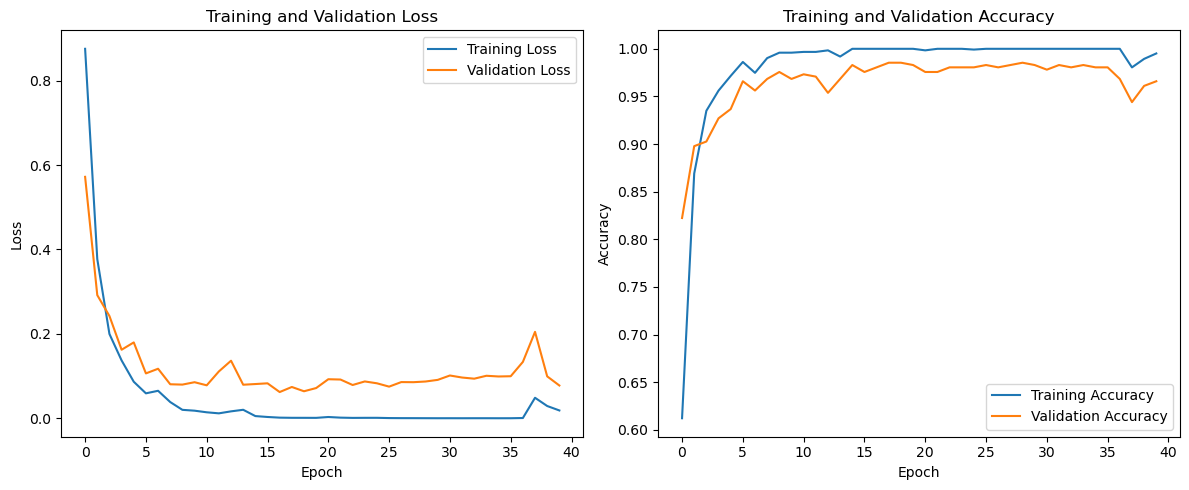

In [58]:
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Predict the test

18/18 [==============================] - 1s 28ms/step


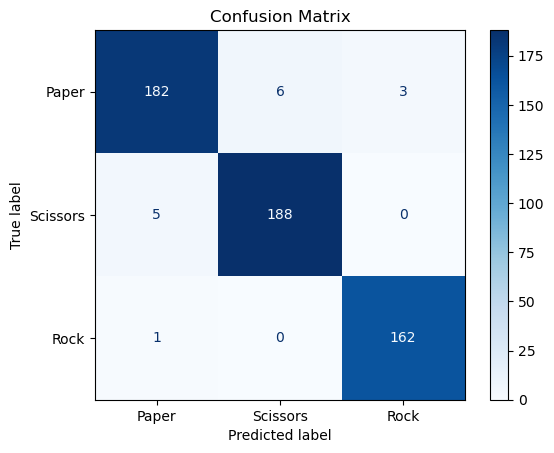


Classification Report:
              precision    recall  f1-score   support

       Paper       0.97      0.95      0.96       191
    Scissors       0.97      0.97      0.97       193
        Rock       0.98      0.99      0.99       163

    accuracy                           0.97       547
   macro avg       0.97      0.97      0.97       547
weighted avg       0.97      0.97      0.97       547


Accuracy: 0.9726


In [59]:
from sklearn.metrics import classification_report, accuracy_score

# Predict the labels for the test set
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

y_pred = best_model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
labels = ['Paper', 'Scissors', 'Rock']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_classes, target_names=labels))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'\nAccuracy: {accuracy:.4f}')


# Test Score: 0.9817